In [147]:
from binance.spot import Spot
import pandas as pd
import time
import matplotlib.pyplot as plt
from binance.um_futures import UMFutures
from binance.cm_futures import CMFutures
import math
import numpy as np

In [148]:
class Api :
    
    def __init__(self,api_type:str,api_key="",api_secret=""):
        """ api_type est soit spot soit CM soit UM """
        if api_type == "spot" :
            self.client = Spot(api_key,api_secret)
        elif api_type == "CM" :
            self.client = CMFutures(api_key,api_secret)
        elif api_type == "UM" : 
            self.client = UMFutures(api_key,api_secret)

    def get_prices(self,symbol:str,freq:str,limit:int = 500):
        """ Indiquer un symbol du type BTCBUSD/ETHUSD ...  et une freq du type 15m/4h ... """
        klines = self.client.klines(symbol,freq,limit=limit)
        columns = ["Open Time","Open Price","High Price","Low Price","Close price", "Volume", "Close time","Quote asset volume","Number of trades","Taker buy base asset volume","Taker buy quot asset volume","unused"]
        DF = pd.DataFrame(klines,columns=columns)
        DF.index = DF["Open Time"].apply(lambda x : time.ctime(x/1000))
        DF = DF.drop(["Open Time","unused"],axis=1)
        DF['Open Price'] = DF['Open Price'].apply(lambda x: float(x))
        return DF["Open Price"]
    
    def get_volumes(self,symbol:str,freq:str,limit:int = 500):
        """ Indiquer un symbol du type BTCBUSD/ETHUSD ...  et une freq du type 15m/4h ... """
        klines = self.client.klines(symbol,freq,limit=limit)
        columns = ["Open Time","Open Price","High Price","Low Price","Close price", "Volume", "Close time","Quote asset volume","Number of trades","Taker buy base asset volume","Taker buy quot asset volume","unused"]
        DF = pd.DataFrame(klines,columns=columns)
        DF.index = DF["Open Time"].apply(lambda x : time.ctime(x/1000))
        DF['Volume'] = DF['Volume'].apply(lambda x: float(x))
        return DF["Volume"]

    def plot_comparative_index(self,length:int,symbols:list,freq:str):
        '''Indiquer une liste de symboles sous format str e.g BNB, CRV ... et une freq du type 1d/1h ...'''
        Prices = []
        # On trouve la longueur la plus petite pour être certain d'avoir un indexage cohérent
        for symbol in symbols : 
            try : 
                new_length = len(self.get_prices(symbol+"USDT",freq,length))
            except :
                error_symbol = symbol
                print(symbol + ' not found')
                symbols.remove(symbol)
                
            if new_length <= length :
                length = new_length
        
        for symbol in symbols :
            Prices.append(self.get_prices(symbol+"USDT",freq,length))

        BTC_price = self.get_prices("BTCUSDT",freq,length)

        fig = plt.figure(figsize=(20,5))

        for price in Prices :
            tmp_index = (((price/BTC_price).pct_change()+1).cumprod())
            tmp_index[0] = 1
            tmp_index.plot()
        (((BTC_price/BTC_price).pct_change()+1).cumprod()).plot(style='black')
        plt.legend(symbols+["BTC"])
        plt.grid()
        plt.show()
        return "Done"


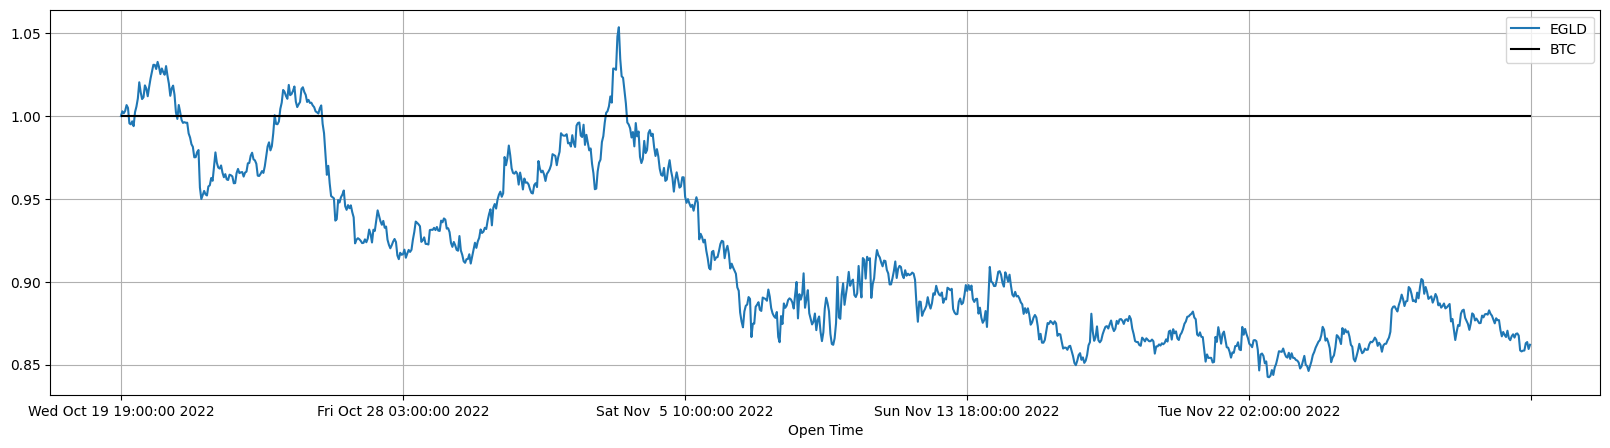

'Done'

In [153]:
api = Api("UM")
api.plot_comparative_index(1000,["EGLD"],"1h")

In [155]:
api = Api("UM")
api.get_prices("BNBUSDT","1d",300).to_excel('bnb_spot.xlsx')
api.get_prices("CRVUSDT","1d",300).to_excel('crv_spot.xlsx')